In [26]:
import numpy as np

a = np.array([[3.0, 12.0 , -2.0],[-12.0, 2.0,22.0],[6.0, 24.0,4.0]])
b = np.array([[24.0],[54.0],[48.0]])

ab = np.concatenate((a,b),1)

permuta = np.copy(ab[1][:])

ab[1] = ab[0]
ab[0][:] = permuta[:]


fator = ab[1][0]/ab[0][0]
print(fator)
ab[1][:] = ab[1] - fator*ab[0][:]

print(ab,"\n")

fator = ab[2][0]/ab[0][0]
print(fator)
ab[2][:] = ab[2] - fator*ab[0][:]
print(ab,"\n")

permuta = np.copy(ab[1][:])

ab[1] = ab[2]
ab[2][:] = permuta[:]
print(ab,"\n")

fator = ab[2][1]/ab[1][1]
print(fator)
ab[2][:] = ab[2] - fator*ab[1][:]
print(ab,"\n")

-0.25
[[-12.    2.   22.   54. ]
 [  0.   12.5   3.5  37.5]
 [  6.   24.    4.   48. ]] 

-0.5
[[-12.    2.   22.   54. ]
 [  0.   12.5   3.5  37.5]
 [  0.   25.   15.   75. ]] 

[[-12.    2.   22.   54. ]
 [  0.   25.   15.   75. ]
 [  0.   12.5   3.5  37.5]] 

0.5
[[-12.   2.  22.  54.]
 [  0.  25.  15.  75.]
 [  0.   0.  -4.   0.]] 



In [36]:
import numpy as np
import matplotlib.pyplot as plt


s0 = np.array([[4.1], [4.4], [4.8], [4.9]])
t = np.array([[2.4], [2.8], [4.0], [5.4]])

X = np.ones((len(t),1))
X = np.concatenate((X, t),1)
print(X,"\n")

Xt = np.transpose(X)
print(Xt,"\n")

XtX = Xt @ X
print(XtX, "\n")

XtY = Xt @ s0
print(XtY, "\n")

sol = np.linalg.inv(XtX) @ XtY
print(sol, "\n")

[[1.  2.4]
 [1.  2.8]
 [1.  4. ]
 [1.  5.4]] 

[[1.  1.  1.  1. ]
 [2.4 2.8 4.  5.4]] 

[[ 4.   14.6 ]
 [14.6  58.76]] 

[[18.2 ]
 [67.82]] 

[[3.62248629]
 [0.25411335]] 



In [42]:
e = X @ sol - s0
print(e, "\n")

EQ = np.sum(np.abs(e**2))

print(EQ, "\n")

[[ 0.13235832]
 [-0.06599634]
 [-0.16106033]
 [ 0.09469835]] 

0.05678244972577694 



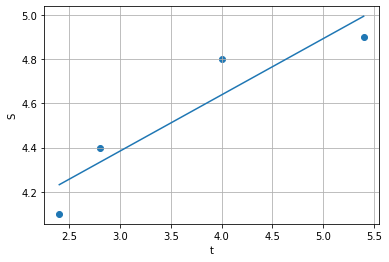

In [46]:
plt.scatter(t, s0)
plt.plot(t, sol[0]+sol[1]*t)
plt.grid()

plt.xlabel("t")
plt.ylabel("S")

plt.savefig('/content/drive/MyDrive/Colab Notebooks/CN/grafico.png')

plt.show()



In [74]:
import numpy as np
import matplotlib.pyplot as plt

c = np.array([[348],[318],[299],[210]])
t = np.array([[34],[46],[62],[69]])

print(c,"\n")
print(t,"\n")

[[348]
 [318]
 [299]
 [210]] 

[[34]
 [46]
 [62]
 [69]] 



In [113]:
Ht = np.array(np.log(t))
print(Ht,"\n")

X = np.ones((len(t),1))
X = np.concatenate((X, c),1)
print(X,"\n")

for i in range(0, len(t)):
  #X[i][2] = np.log(c[i][0]) - np.log(100) - c[i][0]/100
  #X[i][2] = np.log(4)
  pass

print(X,"\n")

[[3.52636052]
 [3.8286414 ]
 [4.12713439]
 [4.2341065 ]] 

[[  1. 348.]
 [  1. 318.]
 [  1. 299.]
 [  1. 210.]] 

[[  1. 348.]
 [  1. 318.]
 [  1. 299.]
 [  1. 210.]] 



In [114]:
Xt = np.copy(X)
Xt = np.transpose(Xt)
print(Xt, "\n")

XtX = Xt @ X
print(XtX, "\n")

Xty = Xt @ Ht
print(Xty, "\n")

sol = np.linalg.inv(XtX) @ Xty
print(sol, "\n")

[[  1.   1.   1.   1.]
 [348. 318. 299. 210.]] 

[[4.00000e+00 1.17500e+03]
 [1.17500e+03 3.55729e+05]] 

[[  15.71624281]
 [4567.85697374]] 

[[ 5.28460889e+00]
 [-4.61463214e-03]] 



In [115]:
a0 = np.exp(sol[0]-np.log(4))
print(a0)
b = sol[1]*100
print(b)

[49.31925296]
[-0.46146321]


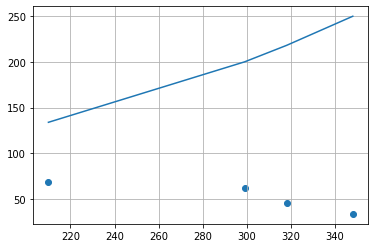

In [116]:
plt.scatter(c, t)
plt.plot(c, (a0*np.exp(-b*(c/100)))+4);

plt.grid()

plt.show()

In [118]:
def f(ao, b):
  return(a0*np.exp(-b*(20/100)))+4

print(f(a0, b))

[58.08772006]
